![BTS](https://github.com/vfp1/bts-mbds-data-science-foundations-2019/raw/master/sessions/img/Logo-BTS.jpg)

# Session 08: GeoSpatial Analysis with Python
### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Advanced Data Analysis (11-05-2020)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-advanced-data-analysis-2020/blob/master/S08_GeoSpatial/08_Advanced_Data_Analysis_GeoSpatial_NOTsolved.ipynb)

**Resources (code patched, refactored, updated and adapted from):**
* O'Reilly library
* fast.ai
* ESA documentation


---



---




# Setup

## Install Rtree (in colab is the hard way)

**NOT NEEDED IN LOCAL IF YOU HAVE RTREE INSTALLED!!!!!!!!!!!!!!!!!!!**

In [0]:
!apt-get install -qq curl g++ make

In [0]:
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   215k      0  0:00:02  0:00:02 --:--:--  215k


In [0]:
import os
os.chdir('spatialindex-src-1.8.5')

In [0]:
!./configure

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [5]:
!make

Making all in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=1 -DHAVE_SYS_TIME_H=1 -DHAVE_STDINT_H=1 -DHAVE_FEATURES_H=1 -DHAVE_GETTIMEOFDAY=1 -DHAVE_MEM

In [9]:
!make install

Making install in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making install in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/storagemanager'
Making install in spatialindex
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Entering directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[3]: Nothing to be done for 'install-exec-am'.
make[3]: Nothing to be done for 'install-data-am'.
make[3]: Leaving directory '/content/spatialindex-src-1.8.5/src/spatialindex'
make[2]: Leaving directory '/content/spatialindex-src-1.8.5/src/spatialindex'
Making i

In [10]:
!ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [11]:
!pip install rtree

  Using cached https://files.pythonhosted.org/packages/56/6f/f1e91001d5ad9fa9bed65875152f5a1c7955c5763168cae309546e6e9fda/Rtree-0.9.4.tar.gz
  Created wheel for rtree: filename=Rtree-0.9.4-cp36-none-any.whl size=21766 sha256=d20b9b19cad92cf27ba1792075fc50b43642466e04cecc9545c258cd854e87fa
  Stored in directory: /root/.cache/pip/wheels/ff/20/c5/0004ef7acb96745ec99be960053902b0b414a2aa2dcad5834e
Successfully built rtree


## Install other libraries

In [2]:
!pip install geopandas

     |████████████████████████████████| 931kB 9.2MB/s 
     |████████████████████████████████| 14.7MB 304kB/s 
     |████████████████████████████████| 10.9MB 55.4MB/s 


In [3]:
!pip install rasterio

     |████████████████████████████████| 18.2MB 241kB/s 


In [4]:
!pip install contextily

In [126]:
!pip install sentinelsat

## Import stuff

In [0]:
import pandas as pd
import geopandas as gpd
import rasterio
import rtree
import contextily as ctx
import matplotlib.pyplot as plt

## Datasets

### Vector datasets

In [0]:
trees_csv = '/content/drive/My Drive/Work/BTS/Group Projects/trees.csv'
bcn_barrios_geojson = '/content/drive/My Drive/Work/BTS/Group Projects/Barcelona_neighbourhoods.geojson'



---



---


# Common vector concepts

## Reading vector geospatial data

In [21]:
bcn_barrios = gpd.read_file(bcn_barrios_geojson)
bcn_barrios.head()

neighbourhood  ...                                           geometry
0                         el Raval  ...  MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3...
1                   el Barri Gòtic  ...  MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3...
2           la Dreta de l'Eixample  ...  MULTIPOLYGON (((2.17093 41.40185, 2.17333 41.4...
3  l'Antiga Esquerra de l'Eixample  ...  MULTIPOLYGON (((2.15972 41.38301, 2.15859 41.3...
4   la Nova Esquerra de l'Eixample  ...  MULTIPOLYGON (((2.14999 41.37562, 2.14983 41.3...

[5 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 29 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


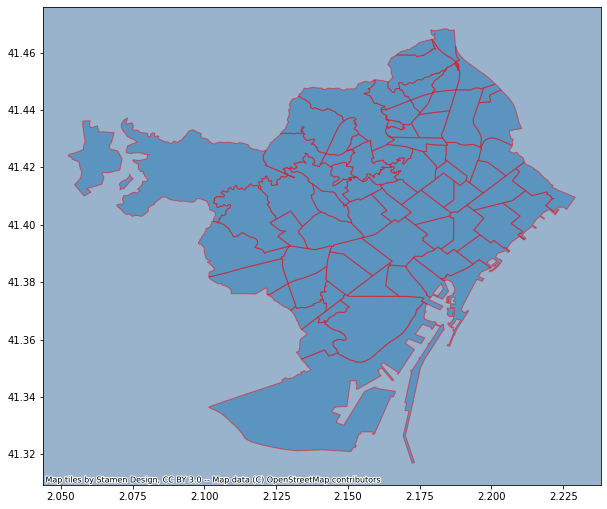

In [29]:
ax = bcn_barrios.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax)

What?!?!?! Our data seems that is in the middle of the ocean. Perhaps we change the Coordinate Reference System (CRS) to the Web Mercator (EPSG: 3857) which is used for web plotting.

In [32]:
bcn_barrios_3857 = bcn_barrios.to_crs(epsg=3857)
bcn_barrios_3857.head()

neighbourhood  ...                                           geometry
0                         el Raval  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
1                   el Barri Gòtic  ...  MULTIPOLYGON (((242997.090 5068668.276, 242999...
2           la Dreta de l'Eixample  ...  MULTIPOLYGON (((241666.488 5071795.769, 241934...
3  l'Antiga Esquerra de l'Eixample  ...  MULTIPOLYGON (((240419.487 5069001.350, 240292...
4   la Nova Esquerra de l'Eixample  ...  MULTIPOLYGON (((239336.015 5067904.697, 239318...

[5 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  


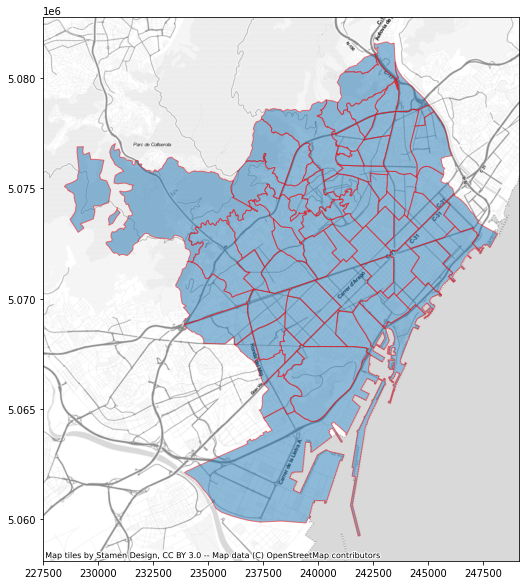

In [33]:
ax = bcn_barrios_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

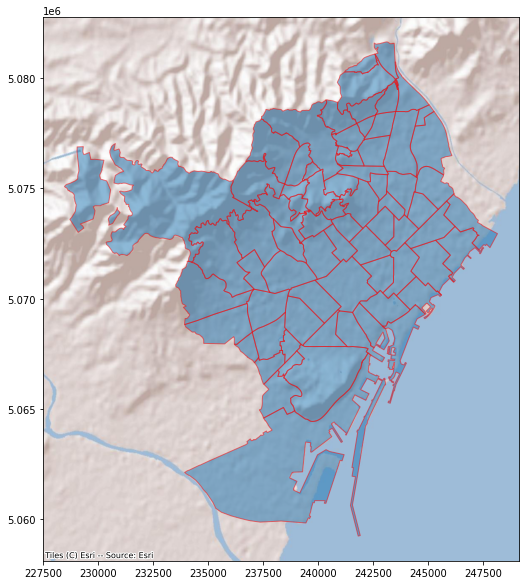

In [37]:
ax = bcn_barrios_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

### Read data without geometry

But with geometry columns in it

In [44]:
# Read csv as pandas
trees = pd.read_csv(filepath_or_buffer=trees_csv)
trees.head()

CODI    X_ETRS89  ...                MIDA_ESCOCELL    VORA_ESCOCELL
0  0000022AR  430319.118  ...  major que o igual a  100 cm  VORA METÀL·LICA
1  0000025AR  430270.562  ...  major que o igual a  100 cm           ALTRES
2  0000028AR  430277.559  ...  major que o igual a  100 cm           ALTRES
3  0000386AR  430035.239  ...  major que o igual a  100 cm  VORA METÀL·LICA
4  0000387AR  430032.831  ...  major que o igual a  100 cm  VORA METÀL·LICA

[5 rows x 23 columns]

In [0]:
trees_gdf = gpd.GeoDataFrame(trees, geometry=gpd.points_from_xy(trees.LONGITUD_WGS84, trees.LATITUD_WGS84))

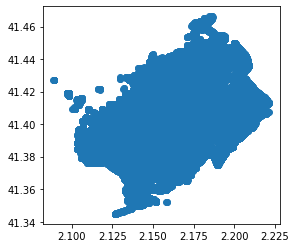

In [46]:
trees_gdf.plot()

We need to add a CRS, because the dataset does not have any yet

In [47]:
print(trees_gdf.crs)

None


We need to set the EPSG to 4326, as this is the provided in the DataFrame

In [48]:
trees_gdf.crs = {'init' :'epsg:4326'}
trees_gdf.crs

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [50]:
trees_gdf.head()

CODI    X_ETRS89  ...    VORA_ESCOCELL                  geometry
0  0000022AR  430319.118  ...  VORA METÀL·LICA  POINT (2.16592 41.43844)
1  0000025AR  430270.562  ...           ALTRES  POINT (2.16535 41.43729)
2  0000028AR  430277.559  ...           ALTRES  POINT (2.16544 41.43734)
3  0000386AR  430035.239  ...  VORA METÀL·LICA  POINT (2.16253 41.43777)
4  0000387AR  430032.831  ...  VORA METÀL·LICA  POINT (2.16250 41.43779)

[5 rows x 24 columns]

/usr/local/lib/python3.6/dist-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 30 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


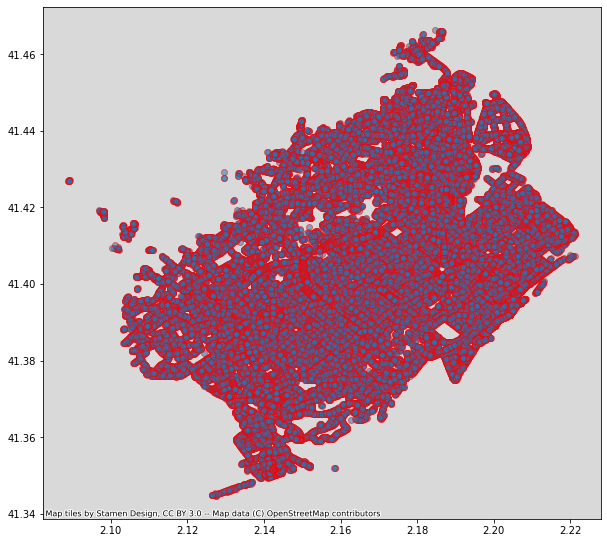

In [49]:
ax = trees_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

Here we go again...

In [51]:
trees_gdf_3857 = trees_gdf.to_crs(epsg=3857)
trees_gdf_3857.head()

CODI    X_ETRS89  ...    VORA_ESCOCELL                        geometry
0  0000022AR  430319.118  ...  VORA METÀL·LICA  POINT (241109.022 5077228.432)
1  0000025AR  430270.562  ...           ALTRES  POINT (241045.971 5077056.881)
2  0000028AR  430277.559  ...           ALTRES  POINT (241055.233 5077064.112)
3  0000386AR  430035.239  ...  VORA METÀL·LICA  POINT (240731.727 5077128.512)
4  0000387AR  430032.831  ...  VORA METÀL·LICA  POINT (240728.488 5077131.378)

[5 rows x 24 columns]

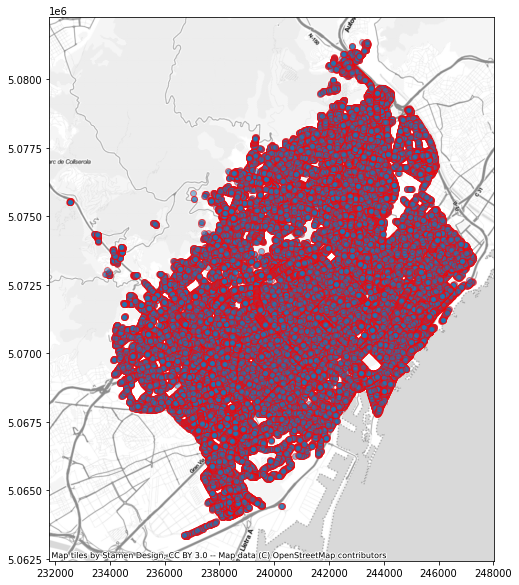

In [52]:
ax = trees_gdf_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

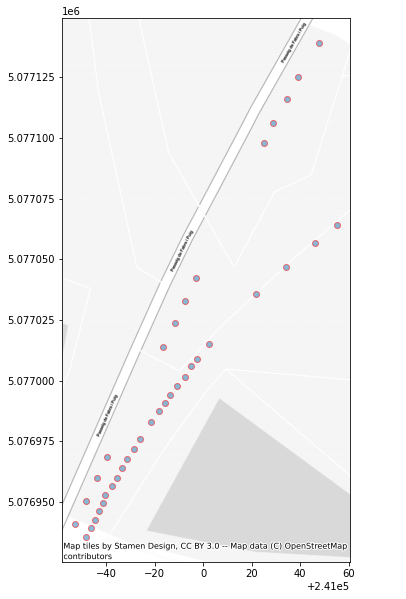

In [92]:
ax = trees_gdf_3857.loc[trees_gdf_3857.ADRECA == 'Pg Fabra i Puig, 450'].plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

## Buffer

UUID - #S8C1

In [0]:
# We change the coordinate system to UTM
trees_gdf_buff = trees_gdf.to_crs("EPSG:3043")

In [0]:
trees_gdf_buff['geometry'] = trees_gdf.geometry.buffer(10)

In [65]:
trees_gdf_buff.head()

CODI  ...                                           geometry
0  0000022AR  ...  POLYGON ((430339.101 4587766.299, 430339.101 4...
1  0000025AR  ...  POLYGON ((430290.546 4587638.494, 430290.546 4...
2  0000028AR  ...  POLYGON ((430297.549 4587643.833, 430297.549 4...
3  0000386AR  ...  POLYGON ((430055.227 4587694.327, 430055.227 4...
4  0000387AR  ...  POLYGON ((430052.816 4587696.493, 430052.816 4...

[5 rows x 24 columns]

Change the CRS again to make it easier to plot with contextily

In [66]:
trees_gdf_buff = trees_gdf_buff.to_crs(epsg=3857)
trees_gdf_buff.head()

CODI  ...                                           geometry
0  0000022AR  ...  POLYGON ((241135.647 5077229.346, 241135.660 5...
1  0000025AR  ...  POLYGON ((241072.595 5077057.795, 241072.608 5...
2  0000028AR  ...  POLYGON ((241081.857 5077065.026, 241081.870 5...
3  0000386AR  ...  POLYGON ((240758.352 5077129.427, 240758.364 5...
4  0000387AR  ...  POLYGON ((240755.112 5077132.293, 240755.125 5...

[5 rows x 24 columns]

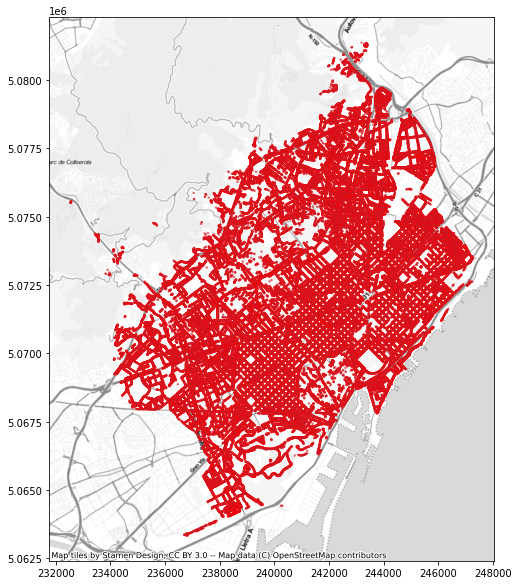

In [67]:
ax = trees_gdf_buff.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

/usr/local/lib/python3.6/dist-packages/contextily/tile.py:629: UserWarning: The inferred zoom level of 21 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


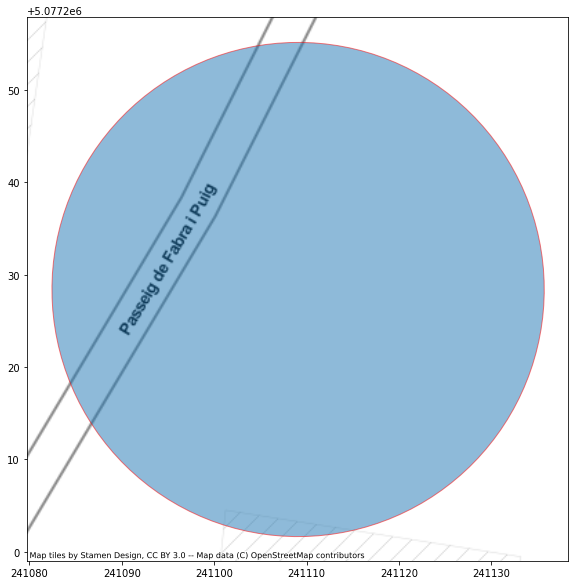

In [68]:
ax = trees_gdf_buff.loc[trees_gdf_buff.CODI == '0000022AR'].plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

## Dissolve

UUID - #S8C2

In [70]:
bcn_barrios.head()

neighbourhood  ...                                           geometry
0                         el Raval  ...  MULTIPOLYGON (((2.17739 41.37535, 2.17853 41.3...
1                   el Barri Gòtic  ...  MULTIPOLYGON (((2.18288 41.38077, 2.18290 41.3...
2           la Dreta de l'Eixample  ...  MULTIPOLYGON (((2.17093 41.40185, 2.17333 41.4...
3  l'Antiga Esquerra de l'Eixample  ...  MULTIPOLYGON (((2.15972 41.38301, 2.15859 41.3...
4   la Nova Esquerra de l'Eixample  ...  MULTIPOLYGON (((2.14999 41.37562, 2.14983 41.3...

[5 rows x 3 columns]

In [0]:
all_barrios_in_one = bcn_barrios.dissolve(by='neighbourhood_group')

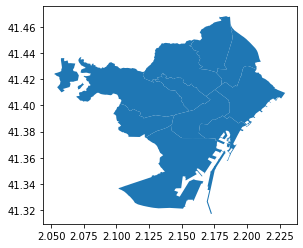

In [74]:
all_barrios_in_one.plot()

Change CRS to be used with contextily

In [0]:
all_barrios_in_one_3857 = all_barrios_in_one.to_crs(epsg=3857)

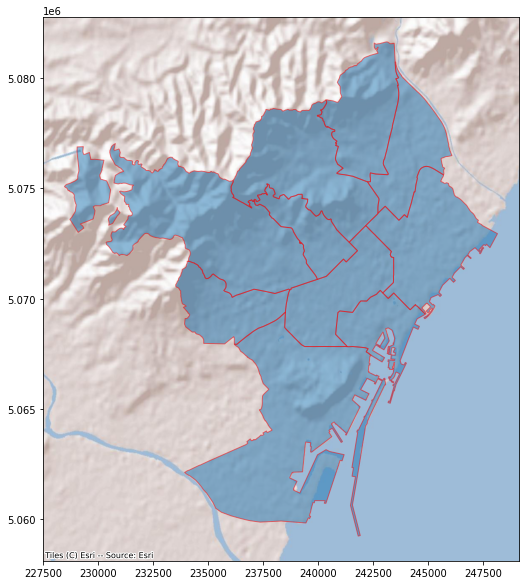

In [76]:
ax = all_barrios_in_one_3857.plot(figsize=(10, 10), alpha=0.5, edgecolor='r')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

## Generalize/Simplify

UUID - #S8C3

In [0]:
all_barrios_simplified = bcn_barrios.simplify(tolerance=100, preserve_topology=True)

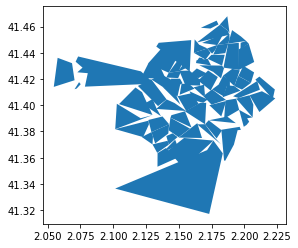

In [80]:
all_barrios_simplified.plot()

Change CRS to be used with contextily

In [0]:
all_barrios_simplified_3857 = all_barrios_simplified.to_crs(epsg=3857)

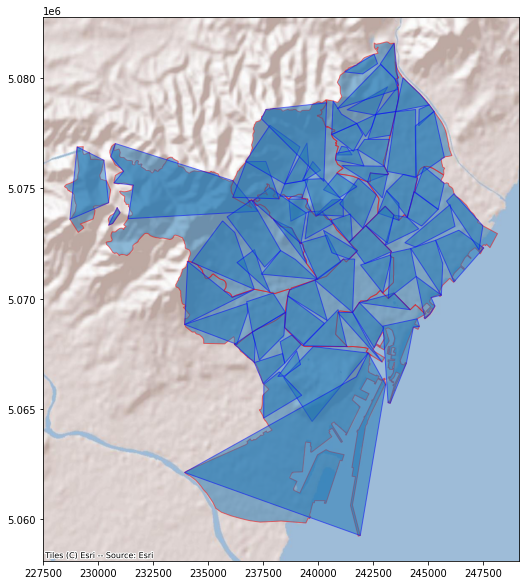

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))

all_barrios_in_one_3857.plot(ax=ax, figsize=(10, 10), alpha=0.5, edgecolor='r')
all_barrios_simplified_3857.plot(ax=ax, figsize=(10, 10), alpha=0.5, edgecolor='b')
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldShadedRelief)

## Spatial Join / Intersection

UUID - #S8C4

In [93]:
barrios_and_trees = gpd.sjoin(left_df=trees_gdf_3857, right_df=bcn_barrios_3857, how='right')
barrios_and_trees.head()

index_left  ...                                           geometry
0     54196.0  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0     54038.0  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0     54039.0  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0     53559.0  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0     53616.0  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...

[5 rows x 27 columns]

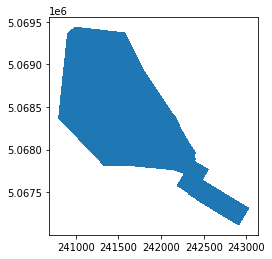

In [94]:
barrios_and_trees.loc[barrios_and_trees.neighbourhood == 'el Raval'].plot()

It seems that our information has disappeared, regarding the trees. No it is not, every tree now is in a row joined by the neighbourhoods polygon. Let's look at the shape:

In [95]:
barrios_and_trees.shape

(157029, 27)

Wow! That's a lot a trees!! We need to split and count trees for each neighbourhood.

![alt text](https://thumbs.gfycat.com/AptGracefulChupacabra-size_restricted.gif)

In [0]:
barrios_and_trees = barrios_and_trees.drop(columns=['index_left', 'CODI', 'X_ETRS89', 'Y_ETRS89', 'LATITUD_WGS84', 'LONGITUD_WGS84'])

In [97]:
barrios_and_trees.head()

TIPUS_ELEMENT  ...                                           geometry
0   ARBRE VIARI  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0   ARBRE VIARI  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0   ARBRE VIARI  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0   ARBRE VIARI  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...
0   ARBRE VIARI  ...  MULTIPOLYGON (((242385.501 5067863.901, 242513...

[5 rows x 21 columns]

Let's count some trees

In [0]:
bt_grouped = barrios_and_trees.groupby(['neighbourhood', 'neighbourhood_group']).count()

In [0]:
bt_grouped = bt_grouped.drop(columns=['ADRECA', 'ALCADA',	'CAT_ESPECIE_ID','NOM_CIENTIFIC','NOM_CASTELLA', 'NOM_CATALA', 'CATEGORIA_ARBRAT', 'AMPLADA_VORERA','DATA_PLANTACIO','TIPUS_AIGUA',	'TIPUS_REG', 'TIPUS_SUPERFICIE', 'TIPUS_SUPORT', 'COBERTURA_ESCOCELL', 'MIDA_ESCOCELL', 'VORA_ESCOCELL', 'geometry'])

In [101]:
bt_grouped.reset_index(level=0, inplace=True)
bt_grouped.head()

neighbourhood  TIPUS_ELEMENT  ESPAI_VERD
neighbourhood_group                                             
Sant Andreu             Baró de Viver            761         151
Horta-Guinardó               Can Baró            437          10
Nou Barris                Can Peguera            435          87
Nou Barris                  Canyelles            764         376
Nou Barris           Ciutat Meridiana            170          77

Let's merge that dataframe with the one from the neighbourhoods

In [0]:
bt_grouped_geom = pd.merge(bt_grouped, bcn_barrios_3857, left_on=bt_grouped.neighbourhood, right_on=bcn_barrios_3857.neighbourhood)

In [0]:
bt_grouped_geom = bt_grouped_geom.drop(columns=['key_0', 'neighbourhood_x'])

Let's turn all this onto a GeoDataFrame again

In [0]:
bt_grouped_gdf = gpd.GeoDataFrame(bt_grouped_geom, geometry=bt_grouped_geom.geometry)

In [120]:
bt_grouped_gdf.crs = {'init' :'epsg:3857'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [131]:
bt_grouped_gdf.crs

<Projected CRS: EPSG:3043>
Name: ETRS89 / UTM zone 31N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - 0°E to 6°E and ETRS89 by country
- bounds: (0.0, 37.0, 6.01, 82.41)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [122]:
bt_grouped_gdf.head()

TIPUS_ELEMENT  ...                                           geometry
0            761  ...  MULTIPOLYGON (((244575.712 5077849.757, 244414...
1            437  ...  MULTIPOLYGON (((241136.941 5074498.216, 241137...
2            435  ...  MULTIPOLYGON (((241072.821 5076918.549, 241079...
3            764  ...  MULTIPOLYGON (((240686.765 5078979.771, 240866...
4            170  ...  MULTIPOLYGON (((242706.212 5080671.846, 242732...

[5 rows x 5 columns]

Text(0.5, 1.0, 'Tree counting per neighbourhood')

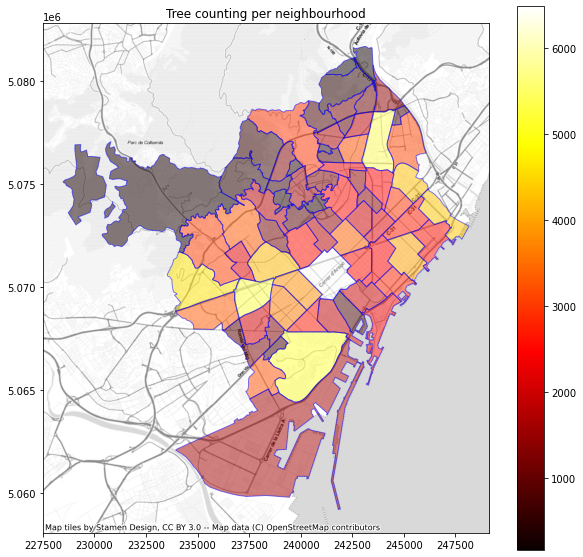

In [123]:
ax = bt_grouped_gdf.plot(figsize=(10,10), alpha=0.5, edgecolor='b', column='TIPUS_ELEMENT', cmap='hot', legend=True)
ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)
plt.title('Tree counting per neighbourhood')

## Saving it as a Shapefile or GeoJson

UUID - #S8C5

In [0]:
bt_grouped_gdf = bt_grouped_gdf.to_crs("EPSG:3043")

In [133]:
bt_grouped_gdf.crs

<Projected CRS: EPSG:3043>
Name: ETRS89 / UTM zone 31N (N-E)
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Europe - 0°E to 6°E and ETRS89 by country
- bounds: (0.0, 37.0, 6.01, 82.41)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [0]:
bt_grouped_gdf.to_file('/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/trees.shp')

In [0]:
bt_grouped_gdf.to_file('/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/trees.geojson', driver='GeoJSON')



---



---





---



---


# IN CLASS EXERCISE: working with vector data

UUID - #S8E1

Download some interesting datasets from Barcelona here (geolocated) [link text](https://opendata-ajuntament.barcelona.cat/data/en/dataset?geolocation=Yes_no_map_view) and do a spatial join by neighbourhood. Also, present a beautiful map with Python and save a shapefile and load it into QGIS.



---



---

# Common raster concepts

UUID - #S8C6

In [0]:
import geopandas as gpd
import pandas as pd
import rasterio
import contextily as ctx
from rasterio.plot import show
import matplotlib.pyplot as plt
from rasterio.plot import show_hist
import numpy as np

## Download Copernicus data

Very well Victor, so where do I get this amazing sort of information?

You need to [`create an account here`](https://scihub.copernicus.eu/)

We will be replicating the API query to the SciHub website

### Get the bounding box

In [0]:
barrios = gpd.read_file(filename=bcn_barrios_geojson)

In [140]:
# Add the same column to dissolve by
barrios['idx'] = 1
barrios

neighbourhood  ... idx
0                                el Raval  ...   1
1                          el Barri Gòtic  ...   1
2                  la Dreta de l'Eixample  ...   1
3         l'Antiga Esquerra de l'Eixample  ...   1
4          la Nova Esquerra de l'Eixample  ...   1
..                                    ...  ...  ..
70                Provençals del Poblenou  ...   1
71               Sant Martí de Provençals  ...   1
72                    la Verneda i la Pau  ...   1
73  Vallvidrera, el Tibidabo i les Planes  ...   1
74  Vallvidrera, el Tibidabo i les Planes  ...   1

[75 rows x 4 columns]

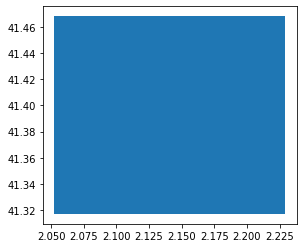

In [145]:
bbox = barrios.dissolve(by='idx').envelope
bbox.plot()

### Connect to SentinelSat API

In [0]:
from sentinelsat import SentinelAPI

api = SentinelAPI('victor.svarmi', '1vAIVA87!', 'https://scihub.copernicus.eu/dhus')

### Query by time and bbox

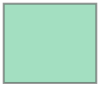

In [147]:
bbox[1]

In [0]:
from datetime import datetime

date_str_start = datetime.strptime('2020/01/01', '%Y/%m/%d')
date_str_end = datetime.strptime('2020/01/15', '%Y/%m/%d')

# Get a dictionary of queries
products_dict = api.query(bbox[1], date=(date_str_start, date_str_end), platformname='Sentinel-2', producttype='S2MSI2A')

In [152]:
products_gdf = api.to_geodataframe(products_dict)
products_gdf

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


title  ...                                           geometry
c1f6e76c-f576-4223-8cd2-596aaa2f169e  S2B_MSIL2A_20200113T104309_N0213_R008_T31TDG_2...  ...  MULTIPOLYGON (((1.80218 41.45752, 3.11687 41.4...
0aa1dd63-1e9c-4588-9413-a04774a8c0ac  S2B_MSIL2A_20200113T104309_N0213_R008_T31TDF_2...  ...  MULTIPOLYGON (((1.81838 40.55671, 3.11529 40.5...
c7024e7f-ae77-4f71-b446-45bd3256ea1c  S2A_MSIL2A_20200111T105421_N0213_R051_T31TDG_2...  ...  MULTIPOLYGON (((1.80218 41.45752, 2.05461 41.4...
be532efb-4111-4624-b803-c3ef0cf754c3  S2A_MSIL2A_20200111T105421_N0213_R051_T31TDF_2...  ...  MULTIPOLYGON (((1.81397 40.80154, 1.85541 40.9...
920c502d-1d75-485d-87be-3efd532c3ffb  S2A_MSIL2A_20200108T104421_N0213_R008_T31TDG_2...  ...  MULTIPOLYGON (((1.80218 41.45752, 3.11687 41.4...
1655e0de-9af9-481e-90d1-bb5888f60b41  S2A_MSIL2A_20200108T104421_N0213_R008_T31TDF_2...  ...  MULTIPOLYGON (((1.81838 40.55671, 3.11529 40.5...
5baede96-64ce-458d-ac9a-81af62ef11fb  S2B_MSIL2A_20200106T105339_N0213_R051_T31TDG_2...  ...  MULTIPOLYGON (((1.80218 41.45752, 2.05192 41.4...
92cc85fd-2a32-4386-aa3b-f3ddfda60d08  S2B_MSIL2A_20200106T105339_N0213_R051_T31TDF_2...  ...  MULTIPOLYGON (((1.81385 40.80791, 1.85808 40.9...
b12da09b-fe6e-451d-a946-8c74b46a5727  S2B_MSIL2A_20200103T104339_N0213_R008_T31TDF_2...  ...  MULTIPOLYGON (((1.81838 40.55671, 3.11529 40.5...
1d7152e2-1032-4e83-bdb8-a3a9826abf99  S2B_MSIL2A_20200103T104339_N0213_R008_T31TDG_2...  ...  MULTIPOLYGON (((1.80218 41.45752, 3.11687 41.4...
28c831e3-d2b1-442f-8285-ce4bbb17bc43  S2A_MSIL2A_20200101T105441_N0213_R051_T31TDG_2...  ...  MULTIPOLYGON (((1.80218 41.45752, 2.05439 41.4...
b8cf2c52-c913-4ced-9261-46896daf9855  S2A_MSIL2A_20200101T105441_N0213_R051_T31TDF_2...  ...  MULTIPOLYGON (((1.81399 40.80002, 1.82643 40.8...

[12 rows x 35 columns]

In [0]:
# To download the images
# Not done here
#api.download_all(products=products_dict, directory_path=my_path)

## Data imports

In [0]:
tci_jp2 = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703.SAFE/GRANULE/L2A_T31TCF_A024072_20200131T105427/IMG_DATA/R10m/T31TCF_20200131T105251_TCI_10m.jp2'
b01_jp2 = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703.SAFE/GRANULE/L2A_T31TCF_A024072_20200131T105427/IMG_DATA/R60m/T31TCF_20200131T105251_B01_60m.jp2'
b04_jp2 = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703.SAFE/GRANULE/L2A_T31TCF_A024072_20200131T105427/IMG_DATA/R10m/T31TCF_20200131T105251_B04_10m.jp2'
b08_jp2 = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703.SAFE/GRANULE/L2A_T31TCF_A024072_20200131T105427/IMG_DATA/R10m/T31TCF_20200131T105251_B08_10m.jp2'
b11_jp2 = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703/S2A_MSIL2A_20200131T105251_N0213_R051_T31TCF_20200131T121703.SAFE/GRANULE/L2A_T31TCF_A024072_20200131T105427/IMG_DATA/R60m/T31TCF_20200131T105251_B11_60m.jp2'

## Open Sentinel2 data

In [0]:
# Open TCI band (True Color Image)
tci = rasterio.open(tci_jp2)

In [15]:
# Count the number of bands in Image
tci.count

3

In [17]:
tci.shape

(10980, 10980)

In [18]:
tci.width

10980

In [19]:
tci.height

10980

In [21]:
tci.bounds

BoundingBox(left=300000.0, bottom=4490220.0, right=409800.0, top=4600020.0)

In [22]:
tci.crs

CRS.from_epsg(32631)

In [23]:
tci.indexes

(1, 2, 3)

### Plot image

In order to do any usage of the bands, first we need to read them. We can read the bands on a rasterio image by passing its index. This will return a NumPy array, and we can do all the indexing we want.

In [25]:
# Not passing any index reads all the bands
tci.read()

array([[[255, 248, 251, ...,  92,  76,  74],
        [255, 249, 249, ...,  81,  64,  54],
        [255, 255, 253, ...,  88,  61,  52],
        ...,
        [  9,   9,   8, ...,   0,   0,   0],
        [ 11,   8,   6, ...,   0,   0,   0],
        [  9,  10,   8, ...,   0,   0,   0]],

       [[255, 255, 255, ...,  90,  78,  68],
        [255, 255, 255, ...,  77,  60,  55],
        [255, 255, 255, ...,  86,  56,  54],
        ...,
        [ 47,  42,  43, ...,   0,   0,   0],
        [ 47,  42,  42, ...,   0,   0,   0],
        [ 46,  45,  43, ...,   0,   0,   0]],

       [[255, 255, 255, ...,  70,  52,  52],
        [255, 255, 255, ...,  60,  46,  46],
        [255, 255, 255, ...,  61,  42,  40],
        ...,
        [ 39,  40,  40, ...,   0,   0,   0],
        [ 38,  39,  43, ...,   0,   0,   0],
        [ 42,  42,  43, ...,   0,   0,   0]]], dtype=uint8)

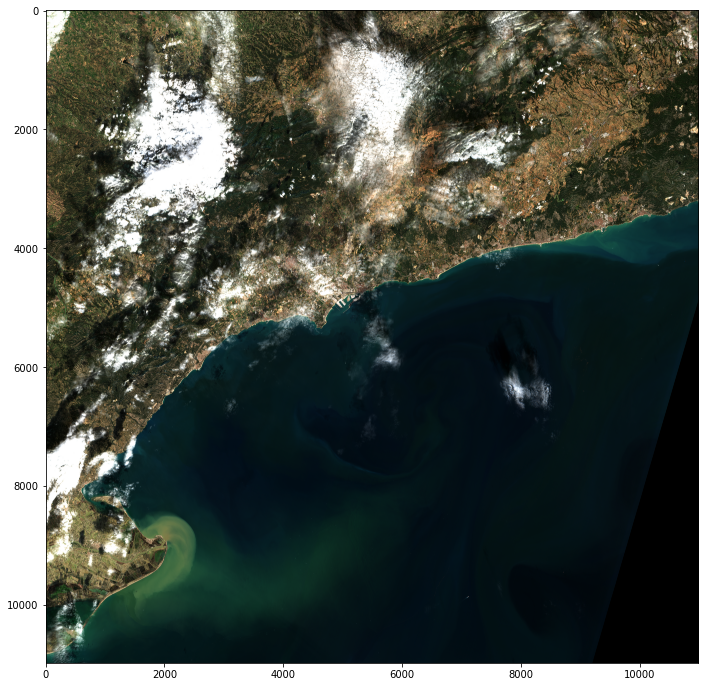

In [32]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show(tci.read(), ax=ax)

Index a dataset by reading it before (it will be a numpy array then

In [37]:
arr = tci.read()
arr.shape

(3, 10980, 10980)

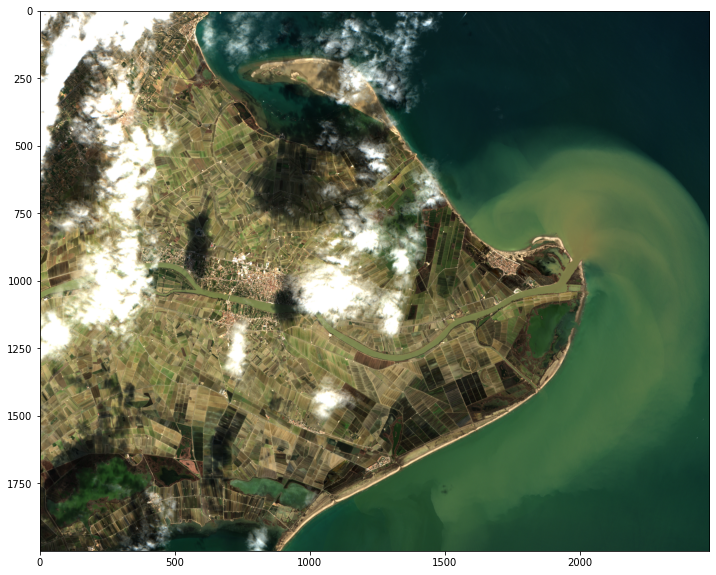

In [39]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show(arr[:,8000:10000, 20:2500], ax=ax)

### Working with different bands (channels)

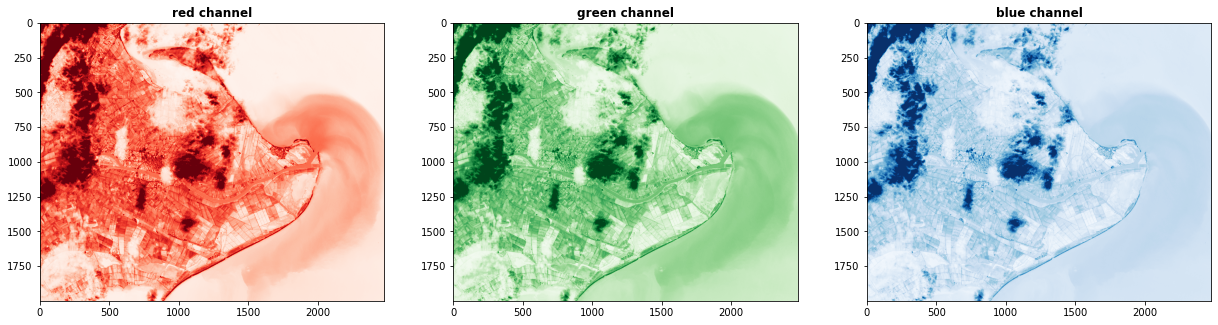

In [47]:
fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
show(arr[0,8000:10000, 20:2500], ax=axr, cmap='Reds', title='red channel')
show(arr[1,8000:10000, 20:2500], ax=axg, cmap='Greens', title='green channel')
show(arr[2,8000:10000, 20:2500], ax=axb, cmap='Blues', title='blue channel')
pyplot.show()

### Generate histograms

Histograms really help to understand the data distribution that we have

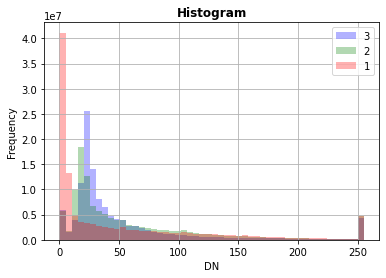

In [49]:
show_hist(tci, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram")

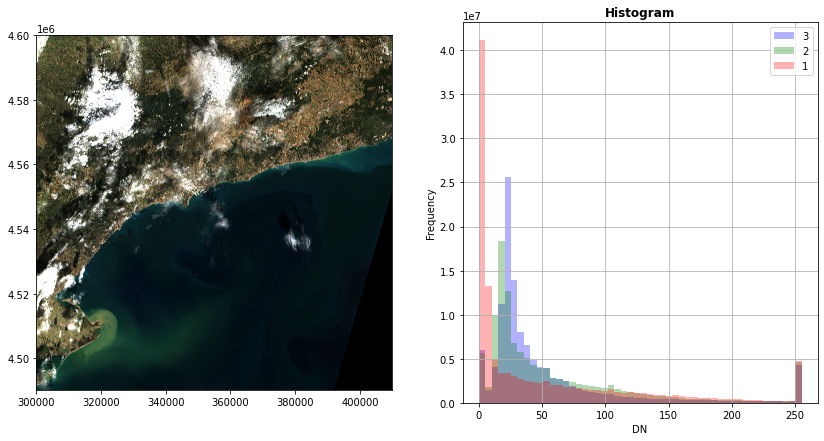

In [50]:
fig, (axrgb, axhist) = pyplot.subplots(1, 2, figsize=(14,7))

show(tci, ax=axrgb)
show_hist(tci, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled', title="Histogram", ax=axhist)
plt.show()

### Opening and working with single band data

In [0]:
# Open B08 NIR band
b08 = rasterio.open(b08_jp2)

In [43]:
arr_b08 = b08.read()
arr_b08.shape

(1, 10980, 10980)

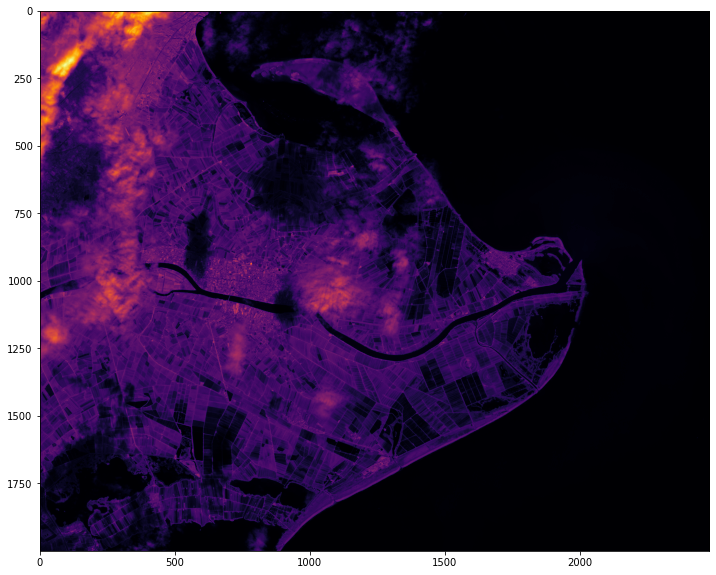

In [45]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show(arr_b08[:,8000:10000, 20:2500], cmap='inferno', ax=ax)

## Band Math in Python 

Remote sensing with code!

### My first NDVI

Remember how the NDVI function works: ${\displaystyle {\mbox{NDVI}}={\frac {({\mbox{NIR}}-{\mbox{Red}})}{({\mbox{NIR}}+{\mbox{Red}})}}}$

Which for Sentinel 2 this equals to:

![alt text](https://earth.esa.int/documents/247904/322303/Level-2A_Algorithms_Equation_2a.jpg)

Then, first we need to import our datasets.

In [0]:
with rasterio.open(b04_jp2) as src:
    b4_red = src.read(1)

In [0]:
with rasterio.open(b08_jp2) as src:
    b8_NIR = src.read(1)

We need to allow the division by zero

In [54]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

### Calculation of NDVI

In [0]:
ndvi = (b8_NIR.astype(float) - b4_red.astype(float)) / (b8_NIR + b4_red)

### Visualization of NDVI

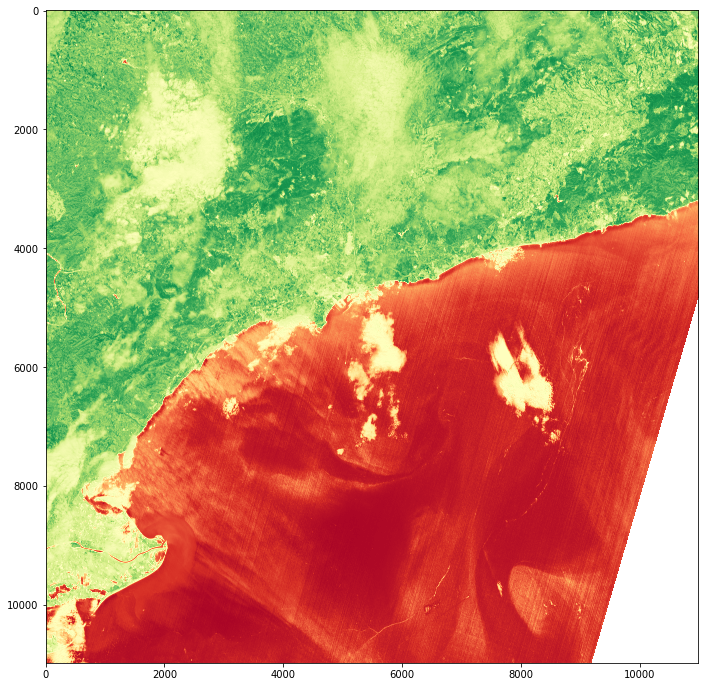

In [59]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show(ndvi, cmap='RdYlGn', ax=ax)

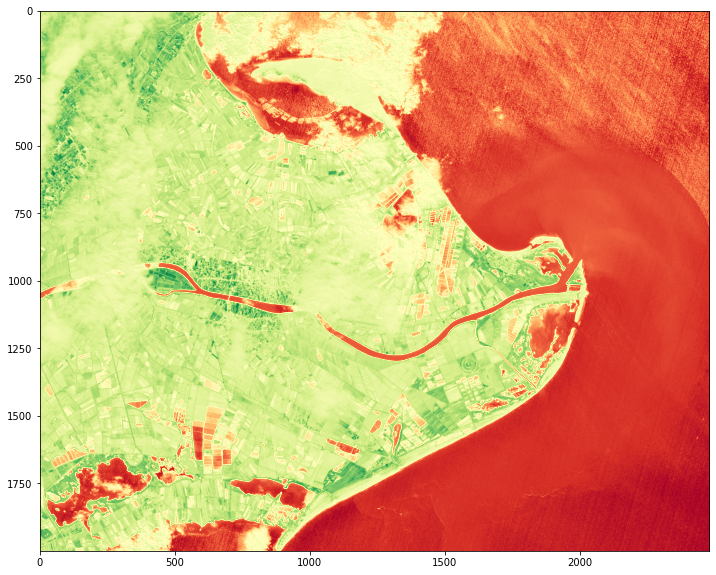

In [58]:
fig, ax = pyplot.subplots(1, figsize=(12, 12))
show(ndvi[8000:10000, 20:2500], cmap='RdYlGn', ax=ax)

### Save raster

We can access the profile saved with the jp2.

In [60]:
b08.profile

{'driver': 'JP2OpenJPEG', 'dtype': 'uint16', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 4600020.0), 'blockxsize': 1024, 'blockysize': 1024, 'tiled': True}

In [0]:
destination_file = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/myndvi.tif'

In [77]:
with rasterio.open(b08_jp2) as src_dataset:

    # Get a copy of the source dataset's profile. Thus our
    # destination dataset will have the same dimensions,
    # number of bands, data type, and georeferencing as the
    # source dataset.
    kwds = src_dataset.profile

    # Change the format driver for the destination dataset to
    # 'GTiff', short for GeoTIFF.
    kwds['driver'] = 'GTiff'

    # Add GeoTIFF-specific keyword arguments.
    kwds['tiled'] = True
    kwds['blockxsize'] = 256
    kwds['blockysize'] = 256
    kwds['dtype'] = rasterio.float32
    kwds['count'] = 1
    #kwds['photometric'] = 'YCbCr'
    #kwds['compress'] = 'JPEG'

    print(kwds)

    with rasterio.open(destination_file, 'w', **kwds) as dst_dataset:
        dst_dataset.write_band(1, ndvi.astype(rasterio.float32))

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 10980, 'height': 10980, 'count': 1, 'crs': CRS.from_epsg(32631), 'transform': Affine(10.0, 0.0, 300000.0,
       0.0, -10.0, 4600020.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True}


### Work with raster and shapefiles


In [0]:
shape = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/trial_shapefile.shp'

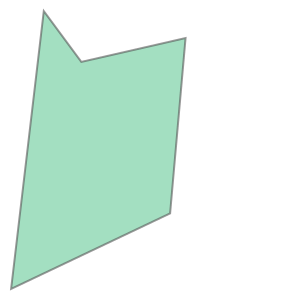

In [99]:
shape_gdf = gpd.read_file(filename=shape)
shape_gdf.geometry[0]

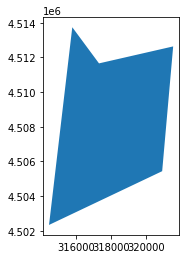

In [91]:
shape_gdf.plot()

Make sure that the shape and the raster has the same CRS

In [85]:
shape_gdf.crs

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 0°E to 6°E - by country
- bounds: (0.0, 0.0, 6.0, 84.0)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [86]:
b08.crs

CRS.from_epsg(32631)

#### Apply rasterio mask

Unfortunately rasterio wants coordinates in a fiona fashion. Let's do that.

In [0]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [105]:
coords = getFeatures(shape_gdf)
print(coords)

[{'type': 'Polygon', 'coordinates': [[[315759.7398699669, 4513737.979643686], [317300.31279023894, 4511653.675104494], [321577.6681924059, 4512632.392018549], [320943.31463699974, 4505437.010261514], [314418.5352099654, 4502337.740033672], [315759.7398699669, 4513737.979643686]]]}]


In [0]:
with rasterio.open(destination_file) as src:
    out_image, out_transform = rasterio.mask.mask(src, coords, crop=True)
    out_meta = src.meta.copy()

In [0]:
destination_file_cropped = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/myndvi_cropped.tif'

In [0]:
out_meta.update({"driver": "GTiff",
                 "count":1, 
                 "dtype":rasterio.float32,
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open(destination_file, "w", **out_meta) as dest:
    dest.write(out_image)

#### Check output

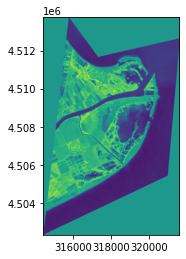

In [125]:
ndvi_cropped = rasterio.open(destination_file)
show(ndvi_cropped)

Hint, you could precrop and save cropped images before doing any large scale processing. It is always handy to keep source cropped data while doing remote sensing stuff.

### Save a raster with different bands (multiband combination)

In [0]:
destination_file_stacked = '/content/drive/My Drive/Work/BTS/Advanced Data Analysis/Session 08 - Geospatial Analysis TF/Data/stacked_images.tif'

In [0]:
import rasterio

file_list = [b08_jp2, b04_jp2, b11_jp2]

# Read metadata of first file
with rasterio.open(file_list[0]) as src0:
    meta = src0.meta

# Update meta to reflect the number of layers
meta.update(count = len(file_list))

# Read each layer and write it to stack
with rasterio.open(destination_file_stacked, 'w', **meta) as dst:
    for id, layer in enumerate(file_list, start=1):
        with rasterio.open(layer) as src1:
            dst.write_band(id, src1.read(1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


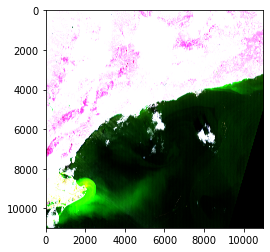

In [160]:
stacked_image = rasterio.open(destination_file_stacked)
show(stacked_image.read(), adjust='linear')

In [0]:
arr_stacked = stacked_image.read()
print(arr_stacked.min(), arr_stacked.max())

In [209]:
from matplotlib.colors import Normalize
from matplotlib.pyplot import imshow
import numpy as np

arr_stacked = stacked_image.read()
arr_stacked = np.rollaxis(arr_stacked, 0, 3)
print(arr_stacked.shape)

(10980, 10980, 3)


In [0]:
arr_stacked_scaled = (arr_stacked.astype(float) - 255.0)/255.0

In [0]:
arr_stacked_scaled.max()

In [0]:
imshow(arr_stacked_scaled[8000:10000, 20:2500,:], norm=Normalize(vmin=30, vmax=250, clip=False))

In [157]:
stacked_image.count

3

In [169]:
arr_stacked

array([[[4174, 4197, 4176, ..., 2416, 2278, 1894],
        [4197, 4201, 4196, ..., 2234, 2065, 1646],
        [4159, 4186, 4254, ..., 2105, 1625, 1581],
        ...,
        [  20,    1,    4, ...,    0,    0,    0],
        [  25,    0,   10, ...,    0,    0,    0],
        [  22,    0,    9, ...,    0,    0,    0]],

       [[2551, 2415, 2435, ...,  904,  755,  714],
        [2531, 2439, 2433, ...,  753,  618,  532],
        [2559, 2499, 2456, ...,  862,  574,  489],
        ...,
        [  85,   66,   64, ...,    0,    0,    0],
        [ 102,   67,   50, ...,    0,    0,    0],
        [  81,   80,   54, ...,    0,    0,    0]],

       [[3459, 3459, 3452, ..., 1853, 1867, 1848],
        [3461, 3459, 3454, ..., 1845, 1855, 1851],
        [3467, 3453, 3458, ..., 1843, 1836, 1841],
        ...,
        [   3,    0,    0, ...,    0,    0,    0],
        [   6,    0,    0, ...,    0,    0,    0],
        [   0,    0,    0, ...,    0,    0,    0]]], dtype=uint16)



---



---


# EXERCISE IN CLASS: applying other band math

Apply the other band math presented. Save it (cropped or not) and load it in QGIS. Create nice maps and share them.In many, you will need to use stacked images to save or plot them. 

**Warning!** This will be part of the ETL part on the geospatial exercise. So try to do it. I will be requesting maps in class :)